<a href="https://colab.research.google.com/github/RajkumarGalaxy/ComputerVision/blob/master/LayoutParser_table_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LayoutParser

A Python library for Document Image Analysis (DIA)

References:

Official Notebook
https://github.com/Layout-Parser/layout-parser/blob/master/examples/OCR%20Tables%20and%20Parse%20the%20Output.ipynb

Github repo
https://github.com/Layout-Parser/layout-parser

Research paper
https://arxiv.org/abs/2103.15348
https://arxiv.org/pdf/2103.15348.pdf


Dataset
https://arxiv.org/abs/2004.08686



install LayoutParser library from PyPi package and Tesseract OCR Engine. Install other dependencies.

In [1]:
%%bash
pip install -U layoutparser
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 
pip install layoutparser[ocr]      

sudo apt install tesseract-ocr
sudo apt install libtesseract-dev


  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-wg_tpa5y/detectron2
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5034342 sha256=f0a3fc8e2254902722448f5f7d4d3960f6d91e52a50f0f7ee0621efb98ff3538
  Stored in directory: /tmp/pip-ephem-wheel-cache-qsl30d_l/wheels/24/b4/77/2e5f8651761d4b6bd53b5e024a97583d9b043636c0c077ad4d
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=c3bfd8e09ef912001524c272997b408f895407f45ae569bac62b8c66dbd72abc
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built detectron2 fvcore
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=f982a256d4f059ea06a15a02b27c4ed4a6293f21407bc0fdf17e4e40d75f23

  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-wg_tpa5y/detectron2
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling

Import the libraries

In [2]:
import layoutparser as lp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

Clone the source files for example data

In [3]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1023, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 1023 (delta 301), reused 420 (delta 209), pack-reused 494
Receiving objects: 100% (1023/1023), 62.01 MiB | 34.99 MiB/s, done.
Resolving deltas: 100% (530/530), done.


Change directory to read the example data

In [4]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  paper-image.jpg


Read an image from the source files to infer on it

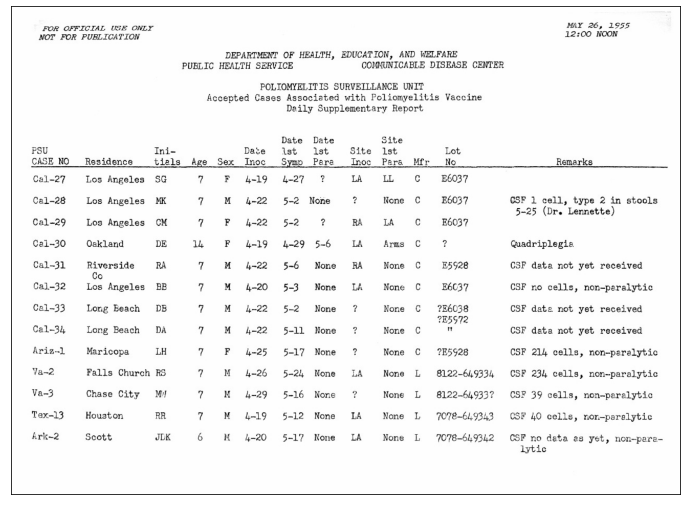

In [5]:
image = cv2.imread('example-table.jpeg')
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Load the TesseractAgent OCR Engine

In [6]:
model = lp.TesseractAgent()

Detect the texts and their locations from the sample image.

In [7]:
res = model.detect(image, return_response=True)

Collect texts and their bounding boxes details as a processible data structure.

In [8]:
ocr  = model.gather_data(res, lp.TesseractFeatureType(4)) 


In [9]:
ocr

Layout(_blocks=[TextBlock(block=Rectangle(x_1=60, y_1=39, x_2=92, y_2=48), text=FOR, id=0, type=None, parent=None, next=None, score=94.0), TextBlock(block=Rectangle(x_1=101, y_1=38, x_2=180, y_2=48), text=OFFICIAL, id=1, type=None, parent=None, next=None, score=96.0), TextBlock(block=Rectangle(x_1=192, y_1=38, x_2=222, y_2=47), text=USE, id=2, type=None, parent=None, next=None, score=94.0), TextBlock(block=Rectangle(x_1=231, y_1=38, x_2=272, y_2=47), text=ONLY, id=3, type=None, parent=None, next=None, score=94.0), TextBlock(block=Rectangle(x_1=1061, y_1=32, x_2=1092, y_2=42), text=MAY, id=4, type=None, parent=None, next=None, score=95.0), TextBlock(block=Rectangle(x_1=1102, y_1=31, x_2=1128, y_2=44), text=26,, id=5, type=None, parent=None, next=None, score=95.0), TextBlock(block=Rectangle(x_1=1141, y_1=32, x_2=1182, y_2=43), text=1955, id=6, type=None, parent=None, next=None, score=95.0), TextBlock(block=Rectangle(x_1=39, y_1=304, x_2=1253, y_2=310), text= , id=7, type=None, parent=Non

Display the image with texts along with their bounding boxes

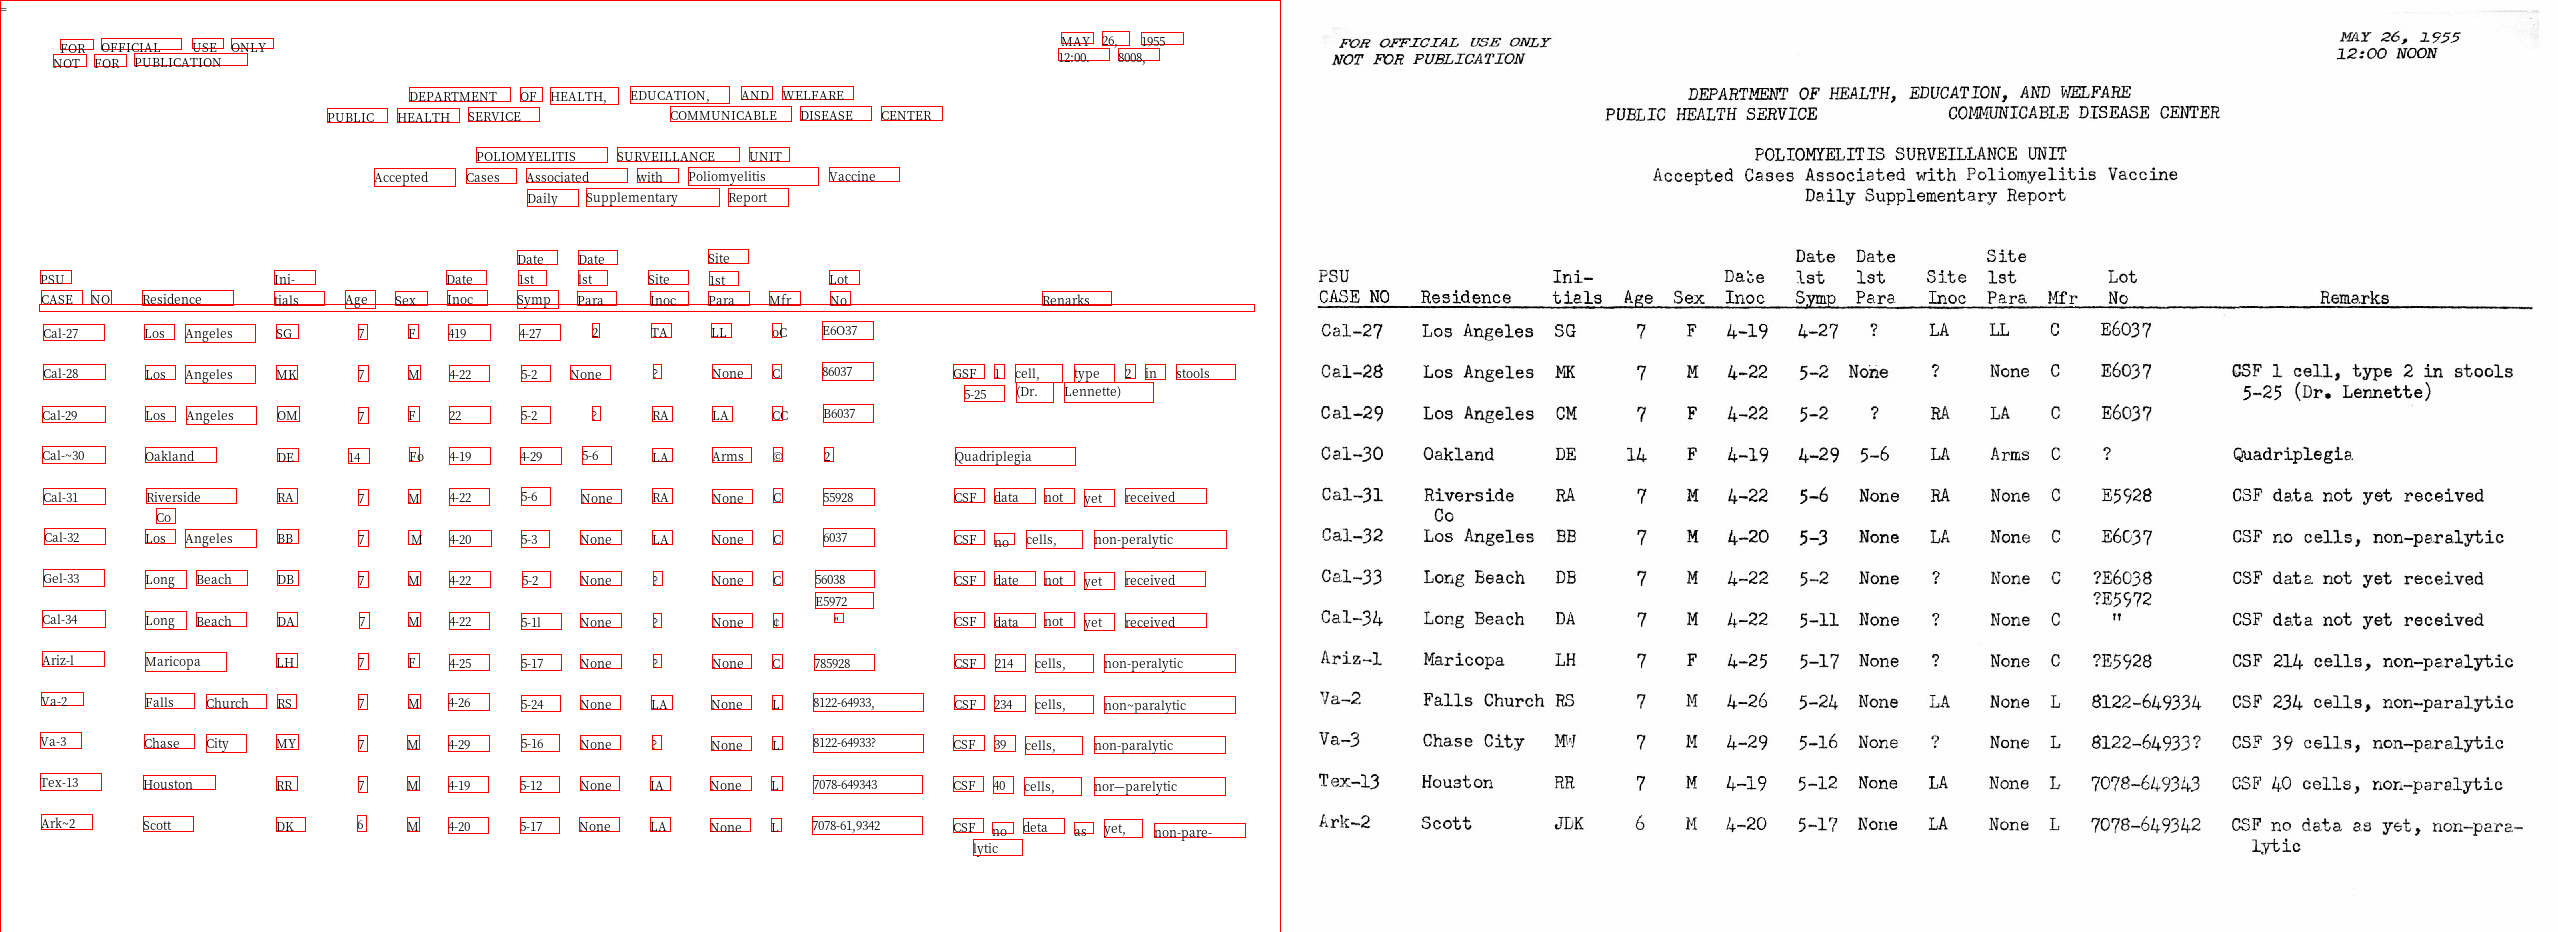

In [10]:
lp.draw_text(image, ocr, font_size=12, with_box_on_text=True,
             text_box_width=1)

We can recognize that the output texts are reproduced with Engine-specified fonts and sizes. Thus the system has recognized texts and their locations precisely. Further, we can post-process these texts in a column-wise manner or row-wise manner as per need.


Thank you for your time!